In [211]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy as cp

In [212]:
%matplotlib inline

#### Read stations data

In [213]:
stations = pd.read_csv('./station_info.csv', skiprows=[1], encoding="ISO-8859-1")
stations = gpd.GeoDataFrame(stations, geometry=gpd.points_from_xy(stations.geoLaenge, stations.geoBreite))
stations.head(3)

,Stations_id,von_datum,bis_datum,Stationshoehe,geoBreite,geoLaenge,Stationsname,Bundesland,Unnamed: 8,Unnamed: 9,Unnamed: 10,geometry
0,3,19370101,20110331,202,50.7827,6.0941,Aachen,Nordrhein-Westfalen,NaN,NaN,NaN,POINT (6.09410 50.78270)
1,11,19800901,20200930,680,47.9737,8.5205,Donaueschingen,(Landeplatz),Baden-Württemberg,NaN,NaN,POINT (8.52050 47.97370)
2,44,19690101,19951130,44,52.9336,8.2370,Großenkneten,Niedersachsen,NaN,NaN,NaN,POINT (8.23700 52.93360)


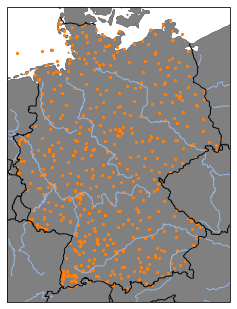

In [214]:
fig, ax = plt.subplots(1,1, figsize=(4,6), subplot_kw=dict(projection=cp.crs.AlbersEqualArea()))
stations.plot(ax=ax, transform=cp.crs.PlateCarree(), c='C1', markersize=5)
ax.coastlines(zorder=-10)
ax.add_feature(cp.feature.LAND, fc='grey')
ax.add_feature(cp.feature.RIVERS)
ax.add_feature(cp.feature.BORDERS)
plt.show()

#### Read windspeed data

In [321]:
winds = pd.read_csv('wind_speed.csv')

Convert windspeed from (`speed`, `direction`) pairs to (`u`, `v`) components

In [322]:
winds['u'] = -1 * winds['F'] * np.sin(winds['D']*np.pi/180)
winds['v'] = -1 * winds['F'] * np.cos(winds['D']*np.pi/180)

In [323]:
winds.MESS_DATUM = pd.to_datetime(winds.MESS_DATUM)
winds = winds.groupby([winds.STATIONS_ID, winds.MESS_DATUM.dt.dayofyear]).max().iloc[:,-5:].reset_index()
winds.head()

,STATIONS_ID,MESS_DATUM,QN_3,F,D,u,v
0,90,1,1.0,5.7,260.0,5.356248,2.571150
1,90,2,1.0,9.7,260.0,8.400446,6.358169
2,90,3,1.0,9.2,280.0,9.060231,4.113841
3,90,4,1.0,7.8,300.0,7.329602,3.750000
4,90,5,1.0,10.1,350.0,9.490895,3.454403


In [324]:
merged = stations.merge(winds, left_on='Stations_id', right_on=winds.STATIONS_ID)#.iloc[:,:]
merged.shape

(13858, 19)

In [325]:
merged['x'] = merged.geometry.x
merged['y'] = merged.geometry.y
merged.head()

,Stations_id,von_datum,bis_datum,Stationshoehe,geoBreite,geoLaenge,Stationsname,Bundesland,Unnamed: 8,Unnamed: 9,...,geometry,STATIONS_ID,MESS_DATUM,QN_3,F,D,u,v,x,y
0,90,19880219,20220217,305,50.7557,9.2583,Alsfeld,Hessen,NaN,NaN,...,POINT (9.25830 50.75570),90,1,1.0,5.7,260.0,5.356248,2.571150,9.2583,50.7557
1,90,19880219,20220217,305,50.7557,9.2583,Alsfeld,Hessen,NaN,NaN,...,POINT (9.25830 50.75570),90,2,1.0,9.7,260.0,8.400446,6.358169,9.2583,50.7557
2,90,19880219,20220217,305,50.7557,9.2583,Alsfeld,Hessen,NaN,NaN,...,POINT (9.25830 50.75570),90,3,1.0,9.2,280.0,9.060231,4.113841,9.2583,50.7557
3,90,19880219,20220217,305,50.7557,9.2583,Alsfeld,Hessen,NaN,NaN,...,POINT (9.25830 50.75570),90,4,1.0,7.8,300.0,7.329602,3.750000,9.2583,50.7557
4,90,19880219,20220217,305,50.7557,9.2583,Alsfeld,Hessen,NaN,NaN,...,POINT (9.25830 50.75570),90,5,1.0,10.1,350.0,9.490895,3.454403,9.2583,50.7557


In [326]:
for i in list(set(merged.MESS_DATUM)):
    if len(merged[merged.MESS_DATUM == i]) < 200:
        print(i)

<IPython.core.display.Javascript object>


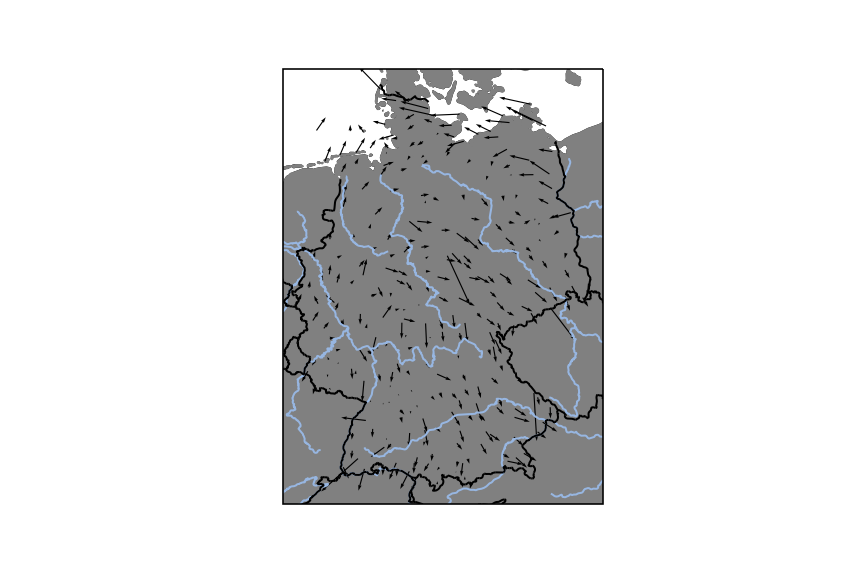

In [327]:
fig, ax = plt.subplots(subplot_kw=dict(projection=cp.crs.Orthographic(central_latitude=50, central_longitude=10)))
ax.quiver(p.x.values, p.y.values, p.u, p.v, transform=cp.crs.PlateCarree())
ax.coastlines(zorder=-10)
ax.add_feature(cp.feature.LAND, fc='grey')
ax.add_feature(cp.feature.RIVERS)
ax.add_feature(cp.feature.BORDERS)
plt.show()

In [328]:
from matplotlib import animation
%matplotlib notebook

<IPython.core.display.Javascript object>


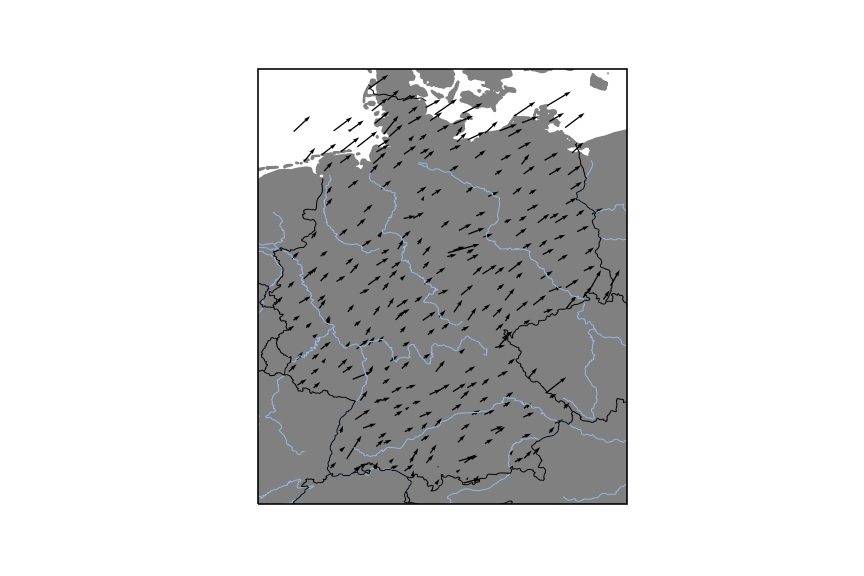

In [329]:
fig, ax = plt.subplots(subplot_kw=dict(projection=cp.crs.Mollweide(central_longitude=10)))

ax.quiver(p.x.values, p.y.values, p.u, p.v, transform=cp.crs.PlateCarree())
ax.coastlines(zorder=-10)
ax.add_feature(cp.feature.LAND, fc='grey')
ax.add_feature(cp.feature.RIVERS, lw=0.5)
ax.add_feature(cp.feature.BORDERS, lw=0.5)

def animate(i):
    time = list(set(merged.MESS_DATUM.values))[i]
    
    ax.clear()
    p = merged[merged.MESS_DATUM==time]

    ax.quiver(p.x.values, p.y.values, p.u, p.v, transform=cp.crs.PlateCarree()).figure

#     ax.coastlines()
    ax.add_feature(cp.feature.LAND, fc='grey')
    ax.add_feature(cp.feature.RIVERS,  lw=0.5)
    ax.add_feature(cp.feature.BORDERS, lw=0.5)

anim = animation.FuncAnimation(fig, animate, frames=len(list(set(merged.MESS_DATUM.values))), interval=0.25)

In [331]:
# anim.save('windspeed.gif')